# Moscow housing prediction

By Hauk Aleksander Olaussen, Charbel Badr and Noran Baskaran

## About the group

TODO

## Introduction

For this project we were tasked to create a machine learning algorithm that could predict house prices in Moscow based on features and known prices of the provided dataset. 

TODO

The following code will allow us to auto reload code when changes are made.

In [2]:
%load_ext autoreload

We begin with importing external and self made modules. Below you can see a description of the modules used:

- `numpy` is the defacto python package for numerical calculation. Most other numerical libraries (including pandas) is based on numpy.
- `pandas` is a widely used package for manipulating (mostly) tabular data
- `matplotlib` is the most used plotting library for python
- `seaborn` contains several convience functions for matplotlib and integrates very well with pandas
- `Visualizer` contains several functions used to plot different parts of the data and their correlation
- `Preprocessor` contains the main bulk of code used to preprocess and feature engineer the data provided to transform the data into something more understandable to a model
- `Model` contiains the model used for predicting the price of an apartment or house based on the data preprocessed by Preprocessor


In [193]:
%autoreload

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from Visualizer import Visualizer
from Preprocessor import Preprocessor
from Model import Model

sns.set_style('darkgrid')

## Describing the data

### Apartments

TODO

### Plotting some important features

As one can see below, there is a strong correlation between the total area of an apartment, and what the total price will be. This is of course not surprising, as size is often something that has a strong influence on what the price of an apartment (or house) will be. 

As the bulk of the data lies below in prices below `1 billion`, we have removed the three outliers <span style="color:red">(in red)</span> you can see in the first plot, to get a simpler visual view of how the area affects the total price in the second.

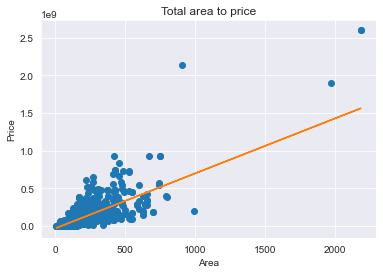

In [169]:
visualizer = Visualizer()
m, b = visualizer.area_to_price()

We see that we do have a clear correlation between the two, but of course, not enough for an accurate prediction with this alone.

If we were to predict based on only this data alone - we could use the linear regression function found in the first plot.
This function looks like this rounded to two decimals:

In [170]:
 "f(x) = %sx %s" % (round(m, 2), round(b, 2))

'f(x) = 731119.6x -30876411.05'

### Trying to predict lineraly based on only total area

Now lets try to predict what the housing prices will be using the some of the training data with just the total area as a feature.
This will be a linear prediction based on the following data:

In [194]:
model = Model()
test_data = visualizer.preprocessor.load_apartments_test()
test_data

,id,seller,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id
0,23285,NaN,71.4,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,5148
1,23286,NaN,54.0,4.0,50.0,4.0,1.0,NaN,3.00,NaN,NaN,1.0,0.0,NaN,NaN,3.0,1.0,1290
2,23287,3.0,39.4,19.6,11.2,10.0,1.0,NaN,2.65,1.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0,681
3,23288,NaN,60.9,NaN,NaN,5.0,2.0,1.0,NaN,1.0,0.0,0.0,1.0,NaN,NaN,0.0,1.0,4261
4,23289,NaN,34.0,9.0,17.0,14.0,1.0,NaN,2.75,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,7530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9932,33217,3.0,106.0,19.9,56.7,16.0,3.0,NaN,3.30,NaN,NaN,NaN,NaN,0.0,1.0,NaN,1.0,4252
9933,33218,NaN,82.0,NaN,NaN,3.0,3.0,NaN,NaN,2.0,0.0,1.0,0.0,NaN,NaN,1.0,2.0,7380
9934,33219,NaN,49.3,NaN,NaN,15.0,1.0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1480
9935,33220,NaN,38.8,10.5,15.1,14.0,1.0,NaN,3.30,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2154


In [195]:
pred = model.predict_linearly(m, b, test_data)
pred.to_csv("prediction.csv", index=False)

In [20]:
#TODO Prediction based on only total area

### Buildings

TODO